In [1]:
import tensorflow as tf
import os

from collections import defaultdict
from scipy.signal import triang

from tensorflow.keras.models import load_model
from lib_dolphin.audio import *
from lib_dolphin.sequential import *
from lib_dolphin.eval import *
from lib_dolphin.discrete import *

FFT_STEP     = 128
FFT_WIN      = 512
FFT_HI       = 230
FFT_LO       = 100

D            = FFT_WIN // 2 - FFT_LO - (FFT_WIN // 2 - FFT_HI)
T            = int((RAW_AUDIO - FFT_WIN) / FFT_STEP)

MODEL_PATH = 'model_v2/'

ids           = pkl.load(open(f"{MODEL_PATH}/ids.pkl", "rb"))
inst          = pkl.load(open(f"{MODEL_PATH}/instances.pkl", "rb"))
predictions   = [x for x in pkl.load(open(f"{MODEL_PATH}/predictions.pkl", "rb"))]
lab           = pkl.load(open(f"{MODEL_PATH}/labels.pkl", "rb"))
clst          = pkl.load(open(f"{MODEL_PATH}/clusters_window.pkl", "rb"))
label_mapping = LabelMapping.mapping(clst)
dim = np.sum([c.n_clusters for c in clst.values()]) + 1
supervised    = load_model(f'{MODEL_PATH}/supervised.h5')    
encoder       = load_model(f'{MODEL_PATH}/encoder.h5')    
reverse       = {v:k for k, v in lab.items()}
encoder.summary()

2022-11-27 15:44:22.454576: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-27 15:44:22.666488: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-11-27 15:44:23.484548: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/usr/local/cuda-11.2/lib64:/usr/local/cuda-11.2/extras/CUPTI/lib64:/usr/local/cuda-11.2/lib64:/usr/local/cuda-11.2/extras/CUPTI/lib64
2022-11-27 15:44:23.484656: W tensorflow/stream_executor/platform/default/dso_load

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 36, 130, 1)]      0         
                                                                 
 model (Functional)          (None, None, 256)         377056    
                                                                 
 lstm_1 (LSTM)               (None, 128)               197120    
                                                                 
Total params: 574,176
Trainable params: 574,176
Non-trainable params: 0
_________________________________________________________________


In [2]:
def spec(x):
    return spectrogram(x, FFT_LO, FFT_HI, FFT_WIN, FFT_STEP)            

07161201_38367000_41013000.wav
36/36 [==============================] - 1s 17ms/step
(20668, 130) (1147, 36, 130, 1) (1147, 5) (1147, 128)
Ee -76.85719299316406
Eb -78.44243621826172
Eb -79.10791015625
Eb -85.75623321533203
Eb -89.18894958496094
Eb -78.31999206542969
Eb -77.26962280273438
Eb -82.4579086303711
Eb -86.03224182128906
Eb -89.80626678466797
Eb -79.3851547241211
Eb -81.91873931884766
Eb -79.48297882080078
Eb -71.7909927368164
Eb -75.92341613769531
Eb -76.43757629394531
Eb -82.48995208740234
Eb -75.5284423828125
Eb -85.30322265625
Ea -69.98453521728516
Ea -83.08109283447266
Eb -74.15560150146484
Eb -82.36685180664062
Eb -81.02159881591797
Eb -83.00900268554688
Eb -82.5278091430664
Eb -80.07257080078125
Eb -85.59014129638672
Eb -78.50497436523438
Eb -76.71439361572266
Eb -78.17095184326172
Eb -70.37963104248047
Eb -59.2390022277832
Eb -70.8708267211914
Eb -84.43016052246094
Eb -71.62528228759766
Eb -81.39311218261719
Eg -85.50849914550781
Eb -79.87870025634766
Eb -82.774658203

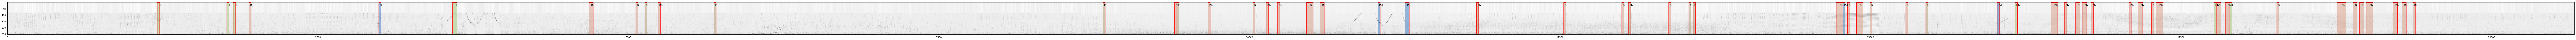

07161201_58212000_60858000.wav
36/36 [==============================] - 1s 16ms/step
(20668, 130) (1147, 36, 130, 1) (1147, 5) (1147, 128)
Bh -31.42159652709961
Bh -39.78464126586914
Bh -41.70616912841797
Uh -37.14725875854492
Uh -35.14765930175781
Eb -51.937408447265625
Bh -39.84114074707031
Uh -34.85368728637695
Uh -31.633817672729492
Eb -44.90852737426758
Uh -36.3723030090332
Eb -52.847412109375
Bh -42.03592300415039
Uh -40.263938903808594
Eb -57.99338912963867
Uh -37.91518783569336
Bh -29.74860382080078
Uh -32.866722106933594
Bh -39.296714782714844
Uh -38.66756057739258
Bh -35.24907302856445
Eb -50.31709671020508
Eb -54.61676788330078
Bh -32.86039352416992
Eg -61.613311767578125
Eb -62.059513092041016
Uh -38.50225067138672
Bh -36.54936599731445
Eb -56.6218147277832
Eb -58.623374938964844
Eb -64.6050033569336
Eb -63.16324996948242
Eb -60.73080062866211
Eb -76.49870300292969
Eb -78.03282165527344
Uh -39.00232696533203
Eb -58.5795783996582
Eb -64.70040893554688
Eb -68.2282485961914
Eb

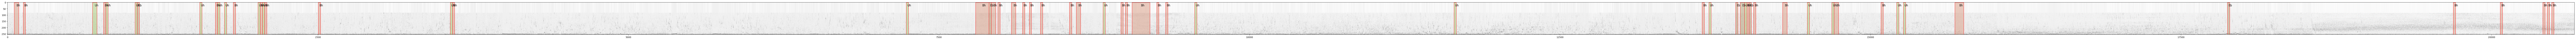

07271201 Canon_0_2646000.wav
36/36 [==============================] - 1s 16ms/step
(20668, 130) (1147, 36, 130, 1) (1147, 5) (1147, 128)
Uh -50.96302032470703
Uh -55.543304443359375
Uh -59.7755126953125
Uh -57.5765380859375
Uh -60.734378814697266
Uh -60.24113845825195
Uh -63.3268928527832
Uh -60.40669631958008
Uh -58.12276077270508
Uh -56.3369026184082
Uh -42.29120635986328
Dd -43.31377410888672
Dd -48.905738830566406
Dd -48.226165771484375
Dd -52.161380767822266
Dd -53.77918243408203
Dd -54.6529541015625
Dd -61.0254020690918
Dd -59.16040802001953
Dd -54.92360305786133
Dd -50.07925796508789
Dd -42.283931732177734
Uh -55.9738655090332
Uh -61.05772018432617
Uh -56.94578170776367
Uh -59.867591857910156
Uh -60.680274963378906
Uh -40.35105895996094
Uh -54.78820037841797
Uh -47.83861541748047
Dd -39.366703033447266
Dd -46.97053146362305
Dd -52.698219299316406
Dd -58.104827880859375
Dd -62.20389175415039
Dd -57.273468017578125
Eb -54.87937545776367
Eb -48.76799392700195
Bh -30.772682189941406

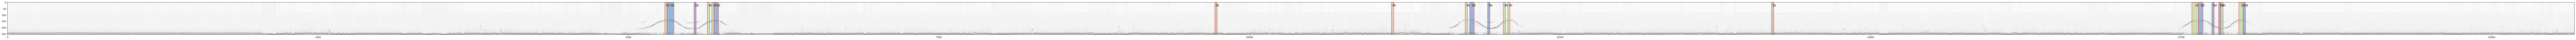

08151201 Canon_0_2646000.wav


KeyboardInterrupt: 

In [9]:
step =  T // 2
path = '../test_encode/larger/'
for file in os.listdir(path):
    if file.endswith('.wav'):
        print(file)
        fp = f"{path}{file}"
        x = raw(fp)
        s = spec(x)
        plottable = spectrogram(x, 0, FFT_WIN // 2, FFT_WIN, FFT_STEP)
        w = windowing(s, T)
        p = supervised.predict(w)
        e = encoder.predict(w)
        print(s.shape, w.shape, p.shape, np.stack(e).shape)
        cur = 0
        labels = []
        for j in range(p.shape[0]):
            l = np.argmax(p[j])            
            if l == 4:
                c = 0
                for i in range(0, step):
                    labels.append(c)
            else:
                x = e[j].reshape(1, e[j].shape[0])
                score = clst[l].score(x)
                cluster_number = clst[l].predict(x)[0]                                
                ci = 1 + label_mapping.fwd(l, cluster_number) 
                print(i2name(ci, reverse, label_mapping), score)
                if score > -50:
                    for i in range(0, step):                
                        labels.append(ci)
                else:
                    for i in range(0, step):
                        labels.append(0)
                    
            cur += step
        c = compress_neural(labels, len(s), reverse, label_mapping)
        plot_neural(plottable, c, None)  
        